In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Functions
def kappa_function(distance, min_kappa=0.01):
    return min_kappa * math.exp(distance)

def euclidean_distance(current_position, destination_pos):
    curr_x, curr_y = current_position
    dest_x, dest_y = destination_pos
    return math.sqrt((dest_x - curr_x)**2 + (dest_y - curr_y)**2)

def angle_between_points(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.atan2(y2 - y1, x2 - x1)

def b_line_move(current_direction):
    return np.random.vonmises(mu=current_direction, kappa=100)

def forage_move(current_direction):
    return np.random.vonmises(mu=current_direction, kappa=0.01)

# Patch positions
patches = {'patch_1': (50, 50),
           'patch_2': (50, -50),
           'patch_3': (-50, -50),
           'patch_4': (-50, 50)}


# Functions
def kappa_function(distance, min_kappa=0.01):
    return min_kappa * np.exp(distance)

def euclidean_distance(current_position, destination_pos):
    return np.linalg.norm(np.array(destination_pos) - np.array(current_position))

def angle_between_points(point1, point2):
    delta = np.array(point2) - np.array(point1)
    return np.arctan2(delta[1], delta[0])

def b_line_move(current_direction, kappa=10):
    return np.random.vonmises(mu=current_direction, kappa=kappa)

def forage_move(current_direction, kappa=0.01):
    return np.random.vonmises(mu=current_direction, kappa=kappa)

def vectorized_movement(start_pos, patches, steps_per_patch=25):
    trajectory = [np.array(start_pos, dtype=float)]
    current_pos = np.array(start_pos, dtype=float)

    for patch_name, patch_pos in patches.items():
        # Move in a beeline toward the patch
        while euclidean_distance(current_pos, patch_pos) > 1:
            direction = angle_between_points(current_pos, patch_pos)
            move_angle = b_line_move(direction)
            move_vector = np.array([np.cos(move_angle), np.sin(move_angle)])
            current_pos += move_vector
            trajectory.append(current_pos.copy())
        
        # Forage within the patch
        for _ in range(steps_per_patch):
            forage_angle = forage_move(direction)
            move_vector = np.array([np.cos(forage_angle), np.sin(forage_angle)])
            current_pos += move_vector
            trajectory.append(current_pos.copy())

    return np.array(trajectory)

start_position = (0, 0)
# Patch positions
patches = {
    'patch_1': (50, 50),
    'patch_2': (50, -50),
    'patch_3': (-50, -50),
    'patch_4': (-50, 50),
    'home': start_position
}

# Simulate movement

path = vectorized_movement(start_position, patches)

# Plot the movement
plt.figure(figsize=(10, 10))
plt.plot(path[:, 0], path[:, 1], marker='o', markersize=2, linestyle='-', color='k')
plt.scatter(*zip(*patches.values()), color='r', s=100, label='Patches')
plt.scatter(start_position[0], start_position[1], color='g', s=100, label='Home')
plt.title("Movement Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


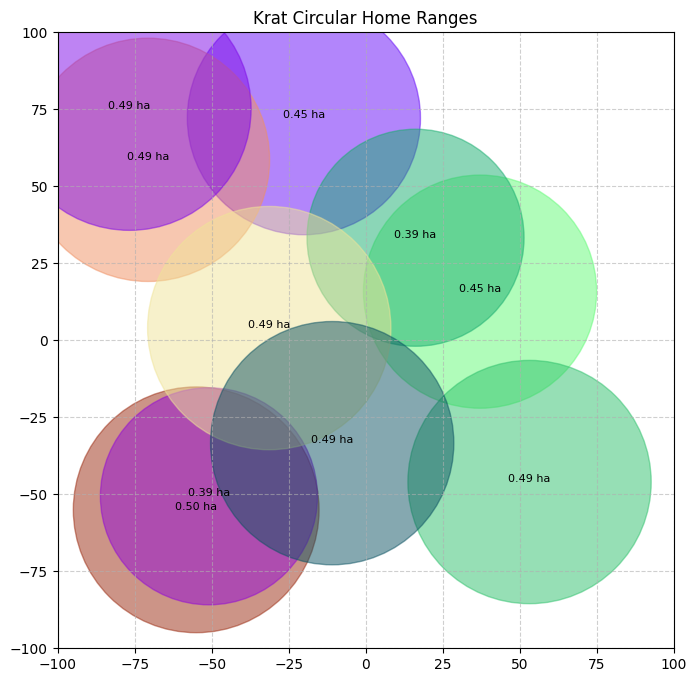

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def hectares_to_diameter(area_hectares):
    """Convert area in hectares to diameter of a circular home range."""
    area_m2 = area_hectares * 10_000  # Convert hectares to square meters
    radius = np.sqrt(area_m2 / np.pi)  # Solve for radius
    diameter = 2 * radius  # Convert to diameter
    return diameter

def plot_home_ranges(home_range_areas, num_circles=10):
    """Plot circular home ranges given a list of areas in hectares."""
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_aspect('equal')
    ax.set_title("Krat Circular Home Ranges")
    
    # Generate random positions for circles
    np.random.seed(42)
    positions = np.random.uniform(-80, 80, size=(num_circles, 2))
    
    for i in range(num_circles):
        area = np.random.choice(home_range_areas)  # Randomly select an area
        diameter = hectares_to_diameter(area)
        radius = diameter / 2
        
        circle = plt.Circle(positions[i], radius, color=np.random.rand(3,), alpha=0.5)
        ax.add_patch(circle)
        ax.text(positions[i, 0], positions[i, 1], f"{area:.2f} ha", ha='center', fontsize=8)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Example list of home range areas in hectares
home_range_areas = [0.33, 0.39, 0.45, 0.49, 0.5]
plot_home_ranges(home_range_areas)

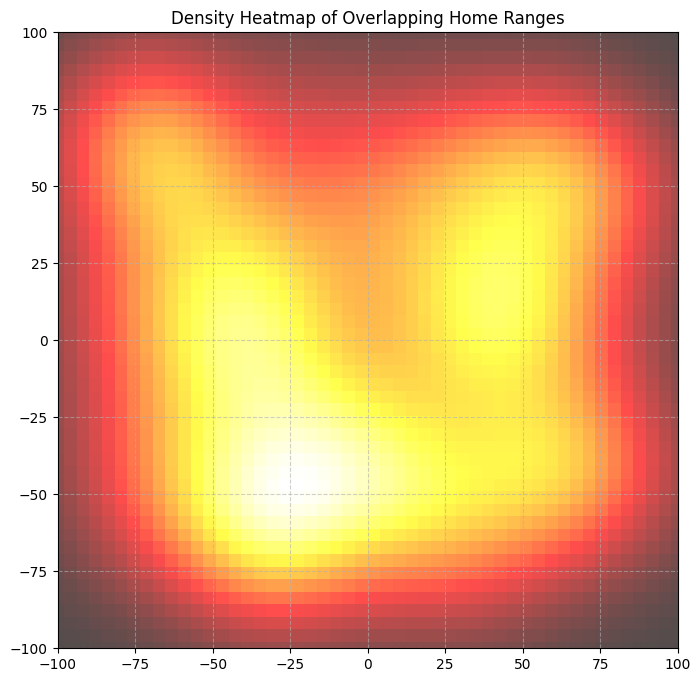

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def hectares_to_diameter(area_hectares):
    """Convert area in hectares to diameter of a circular home range."""
    area_m2 = area_hectares * 10_000  # Convert hectares to square meters
    radius = np.sqrt(area_m2 / np.pi)  # Solve for radius
    diameter = 2 * radius  # Convert to diameter
    return diameter

def generate_positions(home_range_areas, num_circles=100):
    """Generate random positions and store them based on circle density."""
    np.random.seed(42)
    positions = np.random.uniform(-80, 80, size=(num_circles, 2))
    return positions

def plot_density_heatmap(positions, bins=50):
    """Plot heatmap based on density of overlapping circles."""
    x, y = positions[:, 0], positions[:, 1]
    
    # Perform KDE (Kernel Density Estimation)
    kde = gaussian_kde([x, y])
    xi, yi = np.meshgrid(np.linspace(-100, 100, bins), np.linspace(-100, 100, bins))
    zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot heatmap
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_title("Krat density profile")
    ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='hot', alpha=0.7)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Example list of home range areas in hectares
home_range_areas = [0.33, 0.39, 0.45, 0.49, 0.5]
positions = generate_positions(home_range_areas, num_circles=100)
plot_density_heatmap(positions)

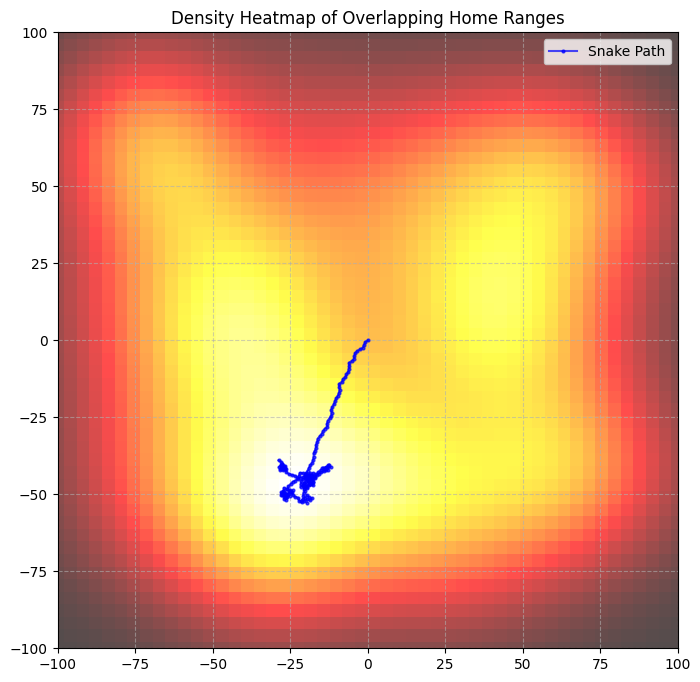

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import gaussian_kde, vonmises

def hectares_to_diameter(area_hectares):
    """Convert area in hectares to diameter of a circular home range."""
    area_m2 = area_hectares * 10_000  # Convert hectares to square meters
    radius = np.sqrt(area_m2 / np.pi)  # Solve for radius
    diameter = 2 * radius  # Convert to diameter
    return diameter

def generate_positions(home_range_areas, num_circles=100):
    """Generate random positions and store them based on circle density."""
    np.random.seed(42)
    positions = np.random.uniform(-80, 80, size=(num_circles, 2))
    return positions

def kappa_function(density, max_kappa=100, min_kappa=0.01):
    """Determine kappa based on density; lower density results in ballistic movement, higher density results in more randomized movement."""
    return max_kappa * np.exp(-density) + min_kappa

def euclidean_distance(current_position, destination_pos):
    return np.linalg.norm(np.array(destination_pos) - np.array(current_position))

def angle_between_points(point1, point2):
    delta = np.array(point2) - np.array(point1)
    return np.arctan2(delta[1], delta[0])

def b_line_move(current_direction, kappa=10):
    return np.random.vonmises(mu=current_direction, kappa=kappa)

def forage_move(current_direction, kappa=0.01):
    return np.random.vonmises(mu=current_direction, kappa=kappa)

def density_based_movement(start_pos, density_map, steps_per_zone=25):
    trajectory = [np.array(start_pos, dtype=float)]
    current_pos = np.array(start_pos, dtype=float)
    
    # Identify high-density zones
    high_density_points = sorted(density_map.items(), key=lambda x: x[1], reverse=True)[:5]
    target_points = [np.array(point) for point, _ in high_density_points]
    
    for target in target_points:
        while euclidean_distance(current_pos, target) > 1:
            direction = angle_between_points(current_pos, target)
            move_angle = b_line_move(direction)
            move_vector = np.array([np.cos(move_angle), np.sin(move_angle)])
            current_pos += move_vector
            trajectory.append(current_pos.copy())
        
        # Forage within the high-density zone
        for _ in range(steps_per_zone):
            forage_angle = forage_move(direction)
            move_vector = np.array([np.cos(forage_angle), np.sin(forage_angle)])
            current_pos += move_vector
            trajectory.append(current_pos.copy())
    
    return np.array(trajectory)

def plot_density_heatmap(positions, bins=50):
    """Plot heatmap based on density of overlapping circles."""
    x, y = positions[:, 0], positions[:, 1]
    kde = gaussian_kde([x, y])
    xi, yi = np.meshgrid(np.linspace(-100, 100, bins), np.linspace(-100, 100, bins))
    zi = kde(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)
    
    density_map = {(int(round(xi[i, j])), int(round(yi[i, j]))): zi[i, j] for i in range(bins) for j in range(bins)}
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_title("Density Heatmap of Overlapping Home Ranges")
    ax.pcolormesh(xi, yi, zi, shading='auto', cmap='hot', alpha=0.7)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Simulate and plot density-based movement
    start_pos = np.array([0, 0])
    snake_path = density_based_movement(start_pos, density_map)
    ax.plot(snake_path[:, 0], snake_path[:, 1], color='blue', marker='o', markersize=2, linestyle='-', alpha=0.7, label='Snake Path')
    ax.legend()
    
    plt.show()

# Example list of home range areas in hectares
home_range_areas = [0.33, 0.39, 0.45, 0.49, 0.5]
positions = generate_positions(home_range_areas, num_circles=100)
plot_density_heatmap(positions)

